# Домашнее задание 6: классификация текстов

В этом домашнем задании вам предстоит построить классификатор текстов!

Данные мы будем использовать из Kaggle соревнования: https://www.kaggle.com/competitions/nlp-getting-started/data Оттуда надо скачать файл train.csv. На обучающую и тестовую выборки его поделим кодом ниже, менять его не надо!

Мы будем работать с датасетом постов из твиттера. Нам предстоит решать задачу бинарной классификации - определять содержатся ли в твитте информация о настоящей катастрофе/инциденте или нет.

In [2]:
import pandas as pd

In [95]:
data = pd.read_csv('train.csv')

In [96]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [97]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.3, random_state=42)

## Задание 1 (0.5 балла)

Выведете на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

In [98]:
train.isnull().any().any()

True

In [99]:
train = train.fillna("")

In [100]:
train.isnull().any().any()

False

In [101]:
test.isnull().any().any()

True

In [102]:
test = test.fillna("")

In [103]:
test.isnull().any().any()

False

## Задание 2 (1 балл)
Давайте немного посмотрим на наши данные. Визуализируйте (где явно просят) или выведете информацию о следующем:

1. Какое распределение классов в обучающей выборке?
2. Посмотрите на колонку "keyword" - возьмите 10 наиболее встречающихся значений, постройте ступенчатую диаграмму распределения классов в зависимости от значения keyword, сделайте выводы.

In [104]:
train['target'].value_counts()/(len(train)) * 100

0    56.746106
1    43.253894
Name: target, dtype: float64

## Вывод:
Распределение близко к сбалансированному, поскольку с погрешностью, но классы стремятся к соотношению 50/50. 

In [105]:
keywords = train['keyword'].value_counts()
keywords

                         44
damage                   36
siren                    35
wreckage                 34
fatalities               33
                         ..
rescue                   16
epicentre                10
radiation%20emergency     7
inundation                7
threat                    6
Name: keyword, Length: 222, dtype: int64

In [106]:
x= keywords.index.to_list()[:10]

In [110]:
x

['',
 'damage',
 'siren',
 'wreckage',
 'fatalities',
 'deluge',
 'refugees',
 'derail',
 'fear',
 'tsunami']

In [123]:
repeats = keywords.to_list()[:10]

In [124]:
repeats

[44, 36, 35, 34, 33, 31, 30, 30, 30, 30]

In [121]:
df_nat = train.groupby('keyword')['target'].sum()
df_nat

keyword
                       32
ablaze                  4
accident               14
aftershock              0
airplane%20accident    25
                       ..
wounded                13
wounds                  8
wreck                   4
wreckage               34
wrecked                 1
Name: target, Length: 222, dtype: int64

In [125]:
y = []
n = 0
for i in x:
    y.append(df_nat[i]/repeats[n])
    n += 1
y

[0.7272727272727273,
 0.4722222222222222,
 0.11428571428571428,
 1.0,
 0.48484848484848486,
 0.16129032258064516,
 0.5666666666666667,
 0.5,
 0.1,
 0.3333333333333333]

In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

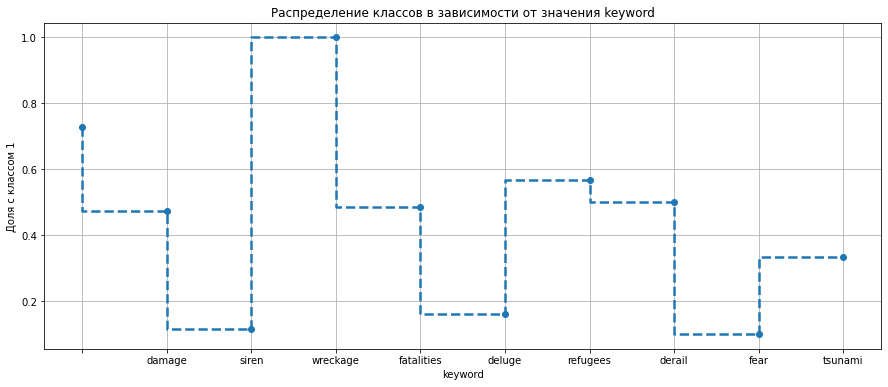

In [135]:
fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot()
 
ax.step(x, y, linestyle = '--', marker='o', linewidth=2.5)
ax.grid()
 
plt.xlabel('keyword')
plt.ylabel('Доля с классом 1')
plt.title('Распределение классов в зависимости от значения keyword')

plt.show()

## Вывод:
Таким образом, у ключевых слов "wreckage" (все повторения имеют таргет 1), " ", "refugees" самая большая доля положительного класса, у "siren", "fear" (все повторения имеют таргет 0) и "deluge" самая большая доля отрицательного класса. 

## Задание 3 (0.5 балла) 

В этом задании предлагается объединить все три текстовых столбца в один (просто сконкатенировать cтроки) и убрать столбец с индексом.

In [146]:
train

,id,keyword,location,text,target
1186,1707,bridge%20collapse,,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0
4071,5789,hail,"Carol Stream, Illinois",GREAT MICHIGAN TECHNIQUE CAMP\nB1G THANKS TO @...,1
5461,7789,police,Houston,CNN: Tennessee movie theater shooting suspect ...,1
5787,8257,rioting,,Still rioting in a couple of hours left until ...,1
7445,10656,wounds,Lake Highlands,Crack in the path where I wiped out this morni...,0
...,...,...,...,...,...
5226,7470,obliteration,Merica!,@Eganator2000 There aren't many Obliteration s...,0
5390,7691,panic,,just had a panic attack bc I don't have enough...,0
860,1242,blood,,Omron HEM-712C Automatic Blood Pressure Monito...,0
7603,10862,,,Officials say a quarantine is in place at an A...,1


In [147]:
train['features'] = train['keyword'] + ' ' + train['location'] + ' ' + train['text']
train = train.drop(['keyword', 'location', 'text', 'id'], axis = 1)

In [148]:
train

,target,features
1186,0,bridge%20collapse Ashes 2015: AustraliaÛªs c...
4071,1,"hail Carol Stream, Illinois GREAT MICHIGAN TEC..."
5461,1,police Houston CNN: Tennessee movie theater s...
5787,1,rioting Still rioting in a couple of hours le...
7445,0,wounds Lake Highlands Crack in the path where ...
...,...,...
5226,0,obliteration Merica! @Eganator2000 There aren'...
5390,0,panic just had a panic attack bc I don't have...
860,0,blood Omron HEM-712C Automatic Blood Pressure...
7603,1,Officials say a quarantine is in place at an...


In [149]:
test['features'] = test['keyword'] + ' ' + test['location'] + ' ' + test['text']
test = test.drop(['keyword', 'location', 'text', 'id'], axis = 1)

In [150]:
test

,target,features
2644,1,destruction So you have a new weapon that can...
2227,0,deluge The f$&amp;@ing things I do for #GISHW...
5448,1,police UK DT @georgegalloway: RT @Galloway4May...
132,0,aftershock Aftershock back to school kick off...
6845,0,"trauma Montgomery County, MD in response to tr..."
...,...,...
4307,0,"hellfire 570 Vanderbilt; Brooklyn, NY New cock..."
3375,1,evacuation USA Bend Post Office roofers cut ga...
1710,1,collided Monsoon flooding - Monsoon rains hav...
4898,1,massacre Ireland Remember this was a massacre ...


## Задание 4 (0.5 балла)

Далее мы будем пока работать только с train частью.

1. Предобработайте данные (train часть) с помощью CountVectorizer.
2. Какого размера получилась матрица?


In [26]:
from sklearn.feature_extraction.text import CountVectorizer
cnt_vec = CountVectorizer()
X = cnt_vec.fit_transform(train['features'])
df = pd.DataFrame(X.toarray(), columns=cnt_vec.get_feature_names())

In [27]:
df

,00,000,0000,00cy9vxeff,00end,00pm,01,011072,014213,02,...,ûïthe,ûïwe,ûïwhen,ûïyou,ûò,ûò800000,ûó,ûóher,ûókody,ûótech
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5324,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5325,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5326,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5327,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
df.shape

(5329, 18455)

## Задание 5 (1 балл)

В предыдущем пункте у вас должна была получиться достаточно большая матрица.
Если вы взгляните на текст, то увидете, что там есть множество специальных символов, ссылок и прочего мусора.

Давайте также посмотрим на словарь, который получился в результате построения CountVectorizer, его можно найти в поле vocabulary_ инстанса этого класса. Давайте напишем функцию, которая печает ответы на следующие вопросы:

1. Найдите в этом словаре все слова, которые содержат цифры. Сколько таких слов нашлось?

2. Найдите все слова, которые содержат символы пунктуации. Сколько таких слов нашлось? 

3. Сколько хэштегов (токен начинается на #) и упоминаний (токен начинается на @) осталось в словаре?

In [29]:
from string import punctuation
#punctuation = list(punctuation)
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [30]:
d = cnt_vec.vocabulary_ 
words = list(d.keys())
print(words)

['bridge', '20collapse', 'ashes', '2015', 'australia', 'ûªs', 'collapse', 'at', 'trent', 'among', 'worst', 'in', 'history', 'england', 'bundled', 'out', 'for', '60', 'http', 'co', 't5trhjuau0', 'hail', 'carol', 'stream', 'illinois', 'great', 'michigan', 'technique', 'camp', 'b1g', 'thanks', 'to', 'bmurph1019', 'hail_youtsey', 'termn8r13', 'goblue', 'wrestleon', 'oaskgki6qj', 'police', 'houston', 'cnn', 'tennessee', 'movie', 'theater', 'shooting', 'suspect', 'killed', 'by', 'di8elzswnr', 'rioting', 'still', 'couple', 'of', 'hours', 'left', 'until', 'have', 'be', 'up', 'class', 'wounds', 'lake', 'highlands', 'crack', 'the', 'path', 'where', 'wiped', 'this', 'morning', 'during', 'beach', 'run', 'surface', 'on', 'elbow', 'and', 'right', 'knee', 'yaqrsximph', 'airplane', '20accident', 'somewhere', 'there', 'experts', 'france', 'begin', 'examining', 'debris', 'found', 'reunion', 'island', 'french', 'air', 'accident', 'tagzbcxfj0', 'mlb', 'bloody', 'isolated', 'city', 'world', 'perth', 'came'

In [31]:
import re
def analysis(words = list)   : 
    kolvo_numb = 0
    kolvo_punkt = 0
    kolvo_hash = 0
    kolvo_tags = 0
    for i in words:
        numbers = re.findall('[0-9]+', i)
        if len(numbers) != 0:
            kolvo_numb += 1
        punkts = re.findall('[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]', i)
        if len(punkts) != 0:
            kolvo_punkt += 1
            
            
        a = i.startswith('#')
        if a == True:
            kolvo_hash += 1    
            
        b = i.startswith('@')
        if b == True:
            kolvo_tags += 1
    return f"Количество строк, содержащих цифры: {kolvo_numb}. Количество строк, содержащих символы пунктуации: {kolvo_punkt}. Количество хэштегов: {kolvo_hash}. Количество упоминаний: {kolvo_tags}."

In [32]:
analysis(words)

'Количество строк, содержащих цифры: 3812. Количество строк, содержащих символы пунктуации: 315. Количество хэштегов: 0. Количество упоминаний: 0.'

## Задание 6 (0.5 балла)

Вспомним, что на семинаре по текстам мы узнали, что в nltk есть специальный токенизатор для текстов - TweetTokenizer. Попробуем применить CountVectorizer с этим токенизатором. Ответьте на все вопросы из предыдущего пункта для TweetTokenizer и сравните результаты.

In [33]:
from nltk.tokenize import TweetTokenizer
tw = TweetTokenizer()
cnt_vec_tok = CountVectorizer(tokenizer=tw.tokenize)

X2 = cnt_vec_tok.fit_transform(train['features'])
df2 = pd.DataFrame(X2.toarray(), columns=cnt_vec_tok.get_feature_names())

In [34]:
df2

,!,#,##youtube,#034,#039,#06,#09,#1-1st,#1008pla,#140,...,ûïthe,ûïwe,ûïwhen,ûïyou,ûò,ûò800000,ûó,ûóher,ûókody,ûótech
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5324,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5325,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5326,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5327,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
d2 = cnt_vec_tok.vocabulary_ 
words2 = list(d2.keys())
print(words2)

['bridge', '%', '20collapse', 'ashes', '2015', ':', 'australia', '\x89', 'ûªs', 'collapse', 'at', 'trent', 'among', 'worst', 'in', 'history', 'england', 'bundled', 'out', 'for', '60', '...', 'http://t.co/t5trhjuau0', 'hail', 'carol', 'stream', ',', 'illinois', 'great', 'michigan', 'technique', 'camp', 'b1g', 'thanks', 'to', '@bmurph1019', '@hail_youtsey', '.', '@termn8r13', '#goblue', '#wrestleon', 'http://t.co/oaskgki6qj', 'police', 'houston', 'cnn', 'tennessee', 'movie', 'theater', 'shooting', 'suspect', 'killed', 'by', 'http://t.co/di8elzswnr', 'rioting', 'still', 'a', 'couple', 'of', 'hours', 'left', 'until', 'i', 'have', 'be', 'up', 'class', 'wounds', 'lake', 'highlands', 'crack', 'the', 'path', 'where', 'wiped', 'this', 'morning', 'during', 'beach', 'run', 'surface', 'on', 'elbow', 'and', 'right', 'knee', 'http://t.co/yaqrsximph', 'airplane', '20accident', 'somewhere', 'there', 'experts', 'france', 'begin', 'examining', 'debris', 'found', 'reunion', 'island', 'french', 'air', 'ac

In [36]:
analysis(words2)

'Количество строк, содержащих цифры: 3939. Количество строк, содержащих символы пунктуации: 7337. Количество хэштегов: 1470. Количество упоминаний: 1679.'

# Вывод:
Как видим, TweetTokenizer помогает создавать более подробный словарь и более тщательно отделять слова не только с буквами, но и сразличными другими символами: так, количествро строк с цифрами и симвовалми пунктуации возросло, и появились строки с хэштегами и пунктуацией, которые ранее не распознавались. 

## Задание 7 (2 балла)

В scikit-learn мы можем оценивать процесс подсчета матрицы через CountVectorizer. У CountVectorizer, как и у других наследников \_VectorizerMixin, есть аргумент tokenizer и preprocessor. preprocessor применится в самом начале к каждой строке вашего датасета, tokenizer же должен принять строку и вернуть токены.
Давайте напишем кастомный токенайзер, которые сделает все, что нам нужно: 

0. Приведет все буквы к нижнему регистру
1. Разобьет текст на токены с помощью TweetTokenizer из пакета nltk
2. Удалит все токены содержащие не латинские буквы, кроме смайликов (будем считать ими токены содержащие только пунктуацию и, как минимум, одну скобочку) и хэштегов, которые после начальной # содержат только латинские буквы.
3. Удалит все токены, которые перечислены в nltk.corpus.stopwords.words('english')
4. Проведет стемминг с помощью SnowballStemmer

Продемонстрируйте работу вашей функции на первых десяти текстах в обучающей выборке.

In [259]:
from nltk.tokenize import TweetTokenizer
tw = TweetTokenizer()
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
noise = stopwords.words('english')
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('english')

def custom_tokenizer(st = str):
    string = st.lower()
    str_tokenized = list(set(tw.tokenize(string)))
    
    i_hash = []
    i_latin = []
    i_smile = []
    
    for i in str_tokenized:
        if re.match(r'(#[a-z]+)', i):
            i_hash.append(i)

        if re.match(r'^[a-z]+$', i):
            i_latin.append(i)
        
        #if re.search('[\W|_]+[(|)]+', i):    
        if re.search('[(!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~)]+[(|)]+', i):    
            i_smile.append(i)
      
    #print(i_latin, i_smile, i_hash)
    tokens = i_latin + i_smile + i_hash 
    clean_tokens = list(set(tokens)- set(noise))
    stemmed_tokens = [stemmer.stem(w) for w in clean_tokens]
    return stemmed_tokens
    
    
    


    
    


[nltk_data] Downloading package stopwords to /Users/Arina/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [260]:
cnt_vec = CountVectorizer(tokenizer = custom_tokenizer)
X = cnt_vec.fit_transform(train['features'].head(10))
df = pd.DataFrame(X.toarray(), columns=cnt_vec.get_feature_names())

In [261]:
cnt_vec.vocabulary_

{'among': 6,
 'england': 30,
 'trent': 85,
 'worst': 90,
 'histori': 42,
 'ash': 7,
 'bridg': 14,
 'bundl': 15,
 'collaps': 23,
 'australia': 9,
 'thank': 83,
 '#goblu': 0,
 'michigan': 57,
 'techniqu': 81,
 'stream': 78,
 'carol': 19,
 '#wrestleon': 2,
 'illinoi': 47,
 'camp': 18,
 'great': 39,
 'hail': 40,
 'tennesse': 82,
 'shoot': 72,
 'theater': 84,
 'polic': 65,
 'cnn': 22,
 'kill': 51,
 'movi': 59,
 'suspect': 80,
 'houston': 45,
 'class': 21,
 'left': 55,
 'hour': 43,
 'riot': 70,
 'still': 77,
 'coupl': 24,
 'right': 69,
 'elbow': 29,
 'wound': 91,
 'highland': 41,
 'surfac': 79,
 'wipe': 88,
 'run': 71,
 'crack': 25,
 'morn': 58,
 'lake': 54,
 'beach': 10,
 'path': 63,
 'knee': 53,
 'somewher': 76,
 'examin': 31,
 'reunion': 68,
 'expert': 34,
 'begin': 11,
 'accid': 3,
 'debri': 27,
 'franc': 36,
 'island': 49,
 'found': 35,
 '#mlb': 1,
 'air': 4,
 'french': 37,
 'airplan': 5,
 'bloodi': 12,
 'smirk': 75,
 'fun': 38,
 'indian': 48,
 'boast': 13,
 'video': 87,
 'killer': 52,


In [262]:
df

,#goblu,#mlb,#wrestleon,accid,air,airplan,among,ash,ask,australia,...,tennesse,thank,theater,trent,venezuela,video,wipe,world,worst,wound
0,0,0,0,0,0,0,1,1,0,1,...,0,0,0,1,0,0,0,0,1,0
1,1,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
5,0,1,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


## Задание 8 (1 балл)

1. Примените CountVectorizer с реализованным выше токенизатором к обучающим и тестовым выборкам.
2. Обучите LogisticRegression на полученных признаках.
3. Посчитайте метрику f1-score на тестовых данных.

In [249]:
y_train = train['target']
X_train = train['features']

y_test = test['target']
X_test = test['features']

In [263]:
from sklearn.linear_model import LogisticRegression 
vec = CountVectorizer(tokenizer = custom_tokenizer, ngram_range=(1, 1))
bow = vec.fit_transform(X_train) 
bow_test = vec.transform(X_test)

clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(bow_test)

from sklearn.metrics import f1_score
f1_score(y_test, pred)

0.7474198804997283

## Задание 9 (1 балл)

1. Повторите 7 задание, но с tf-idf векторизатором. Как изменилось качество?
2. Мы можем еще сильнее уменьшить размер нашей матрицы, если отбросим значения df близкие к единице. Скорее всего такие слова не несут много информации о категории, так как встречаются достаточно часто. Ограничьте максимальный df в параметрах TfIdfVectorizer, поставьте верхнюю границу равную 0.9. Как изменился размер матрицы, как изменилось качество?
3. Также мы можем уменьшить размер матрицы, удаляя слова со слишком маленьким df. Удалось ли добиться улучшения качества? 

In [251]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [252]:
vec2 = TfidfVectorizer(tokenizer = custom_tokenizer, ngram_range=(1, 1))
X2 = vec2.fit_transform(train['features'].head(10))
df2 = pd.DataFrame(X2.toarray(), columns=vec2.get_feature_names())
df2

,#goblu,#mlb,#wrestleon,accid,air,airplan,among,ash,ask,australia,...,tennesse,thank,theater,trent,venezuela,video,wipe,world,worst,wound
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.316228,0.316228,0.00000,0.316228,...,0.000000,0.000000,0.000000,0.316228,0.000000,0.000000,0.000000,0.000000,0.316228,0.000000
1,0.301511,0.000000,0.301511,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.301511,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.349899,0.000000,0.349899,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.272718,0.000000,0.000000,0.231836
5,0.000000,0.267261,0.000000,0.267261,0.267261,0.267261,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.252195,0.000000,0.252195,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.57735,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.330266,0.000000,0.000000,0.000000,0.000000,0.280756


In [253]:
bow2 = vec2.fit_transform(X_train) 
bow_test2 = vec2.transform(X_test)

clf = LogisticRegression(random_state=42)
clf.fit(bow2, y_train)
pred2 = clf.predict(bow_test2)

from sklearn.metrics import f1_score
f1_score(y_test, pred2)

0.7526881720430108

**Ответ:** Как видим, такой векторизатор помогает понять, какую долю составляют повторения токена в конкретном твите из всего количества повторений этого токена. Так, теперь видно, что все имеющиеся повторения примерно одинаково распределены по твитам. На ней также улучшилось качество. 

In [254]:
vec3 = TfidfVectorizer(tokenizer = custom_tokenizer, ngram_range=(1, 1), max_df=0.9)
X3 = vec3.fit_transform(train['features'].head(10))
df3 = pd.DataFrame(X3.toarray(), columns=vec3.get_feature_names())
df3

,#goblu,#mlb,#wrestleon,accid,air,airplan,among,ash,ask,australia,...,tennesse,thank,theater,trent,venezuela,video,wipe,world,worst,wound
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.316228,0.316228,0.00000,0.316228,...,0.000000,0.000000,0.000000,0.316228,0.000000,0.000000,0.000000,0.000000,0.316228,0.000000
1,0.301511,0.000000,0.301511,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.301511,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.349899,0.000000,0.349899,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.272718,0.000000,0.000000,0.231836
5,0.000000,0.267261,0.000000,0.267261,0.267261,0.267261,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.252195,0.000000,0.252195,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.57735,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.330266,0.000000,0.000000,0.000000,0.000000,0.280756


In [255]:
bow3 = vec3.fit_transform(X_train) 
bow_test3 = vec3.transform(X_test)

clf = LogisticRegression(random_state=42)
clf.fit(bow3, y_train)
pred3 = clf.predict(bow_test3)

from sklearn.metrics import f1_score
f1_score(y_test, pred3)

0.7526881720430108

**Ответ:** Установление потолка df не повлияло на размер и качество таблицы на тестовых данных, вероятно, потому что в выборке нет большого количества повторяющихся токенов. 

In [256]:
vec4 = TfidfVectorizer(tokenizer = custom_tokenizer, ngram_range=(1, 1), max_df=0.9, min_df=0.000185)
X4 = vec4.fit_transform(train['features'].head(10))
df4 = pd.DataFrame(X4.toarray(), columns=vec4.get_feature_names())
df4

,#goblu,#mlb,#wrestleon,accid,air,airplan,among,ash,ask,australia,...,tennesse,thank,theater,trent,venezuela,video,wipe,world,worst,wound
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.316228,0.316228,0.00000,0.316228,...,0.000000,0.000000,0.000000,0.316228,0.000000,0.000000,0.000000,0.000000,0.316228,0.000000
1,0.301511,0.000000,0.301511,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.301511,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.349899,0.000000,0.349899,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.272718,0.000000,0.000000,0.231836
5,0.000000,0.267261,0.000000,0.267261,0.267261,0.267261,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.252195,0.000000,0.252195,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.57735,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.330266,0.000000,0.000000,0.000000,0.000000,0.280756


In [257]:
vec4 = TfidfVectorizer(tokenizer = custom_tokenizer, ngram_range=(1, 1), max_df=0.9, min_df=0.000185)
X4 = vec4.fit_transform(X_train)
df4 = pd.DataFrame(X4.toarray(), columns=vec4.get_feature_names())
df4

,#abc7eyewit,#abcnew,#abha,#ableg,#abomb,#abstorm,#accid,#achedin,#act,#actionmoviestaughtus,...,zip,zipper,zmne,zombi,zone,zonewolf,zouma,zss,zumiez,zzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5324,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5325,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5327,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [258]:
bow4 = vec4.fit_transform(X_train) 
bow_test4 = vec4.transform(X_test)

clf = LogisticRegression(random_state=42)
clf.fit(bow4, y_train)
pred4 = clf.predict(bow_test4)

from sklearn.metrics import f1_score
f1_score(y_test, pred4)

0.7526881720430108

## Вывод:
Как видим, ни минимум, ни максимум не помогает улучшить качество модели, поскольку при сокращении количества признаков ошибка увеличивается. 

## Задание 10 (1 балл)

Еще один популяпный трюк, который позволит уменьшить количество признаков называется hashing trick. Его суть в том, то мы случайно группируем признаки ииии  ..... складываем их! А потом удаляем исходные признаки. В итоге все наши признаки это просто суммы исходных. Звучит странно, но это отлично работает. Давайте проверим этот трюк в нашем сеттинге.
Также при таком подходе вам не нужно хранить словарь token->index, что тоже иногда полезно.

1. Повторите задание 7 с HashingVectorizer, укажите количество фичей равное 5000.
2. Какой из подходов показал самый высокий результат?

In [242]:
from sklearn.feature_extraction.text import HashingVectorizer
hv = HashingVectorizer(n_features=5000)
X = hv.fit_transform(train['features'].head(10))
print(X)

  (0, 211)	-0.19245008972987526
  (0, 545)	-0.19245008972987526
  (0, 557)	0.19245008972987526
  (0, 689)	0.19245008972987526
  (0, 797)	-0.19245008972987526
  (0, 1277)	0.19245008972987526
  (0, 1543)	-0.3849001794597505
  (0, 1563)	-0.19245008972987526
  (0, 1572)	0.19245008972987526
  (0, 1596)	0.19245008972987526
  (0, 1658)	0.19245008972987526
  (0, 1842)	0.19245008972987526
  (0, 2494)	-0.19245008972987526
  (0, 2575)	-0.19245008972987526
  (0, 2611)	0.19245008972987526
  (0, 2784)	0.19245008972987526
  (0, 3782)	0.3849001794597505
  (0, 3838)	0.19245008972987526
  (0, 3996)	0.19245008972987526
  (0, 4115)	0.19245008972987526
  (0, 4687)	-0.19245008972987526
  (1, 521)	0.22941573387056174
  (1, 747)	-0.22941573387056174
  (1, 840)	-0.22941573387056174
  (1, 946)	0.22941573387056174
  :	:
  (7, 3733)	0.31622776601683794
  (7, 4728)	0.31622776601683794
  (8, 1539)	0.2886751345948129
  (8, 1780)	-0.2886751345948129
  (8, 1980)	0.5773502691896258
  (8, 2039)	0.2886751345948129
  (8, 

In [243]:
bow5 = hv.fit_transform(X_train) 
bow_test5 = hv.transform(X_test)

clf = LogisticRegression(random_state=42)
clf.fit(bow5, y_train)
pred5 = clf.predict(bow_test5)

from sklearn.metrics import f1_score
f1_score(y_test, pred5)

0.7253481894150418

## Вывод:
В итоге, самый высокий f1-score у tf-idf векторизатора, равный 0.7526881720430108.

## Задание 11 (1 балл)

В этом задании нужно добиться f1 меры хотя в 0.75 на тестовых данных.